In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
from keras.models import load_model
import keras
import glob
import re
import cv2

Using TensorFlow backend.
/apps/python3/3.6.5/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/apps/python3/3.6.5/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/apps/python3/3.6.5/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/apps/python3/3.6.5/lib/python3.6/site-packages/tensorflow/python

In [2]:
encoder = load_model('encoder.h5', compile=False)
opt = keras.optimizers.RMSprop(lr=0.001, decay=1e-6)
encoder.compile(loss='mse',
              optimizer=opt,
              metrics=['cosine_proximity'])

In [3]:
def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower() 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

In [4]:
def calculateDistance(i1, i2):
    return np.linalg.norm(i1 - i2)

In [5]:
# load images
X_data = []
files = natural_sort(glob.glob("/ufrc/cis6930/kunwardeep.singh/GANImages2/*.png"))
for myFile in files:
    if len(X_data) > 10000:
        break
    image = cv2.imread(myFile)
    #Normalizing the input 
    image = (image / 127.5) - 1.
    X_data.append(image)

In [6]:
# load images
X1_data = []
files = natural_sort(glob.glob("/ufrc/cis6930/kunwardeep.singh/GanGenerator/data/train/cifar/*.png"))
for myFile in files:
    image = cv2.imread(myFile)
    #Normalizing the input 
    image = (image / 127.5) - 1.
    X1_data.append(image)

In [7]:
predictions = encoder.predict([X_data])

In [8]:
predictions1 = encoder.predict([X1_data])

In [9]:
gen = load_model('/home/kunwardeep.singh/gan2_cifar_24.h5')

/apps/python3/3.6.5/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [10]:
X = gen.predict(predictions)

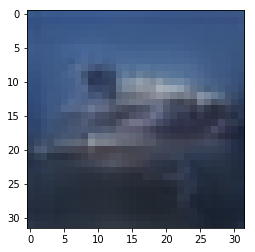

In [11]:
plt.imshow(((X[0] + 1)* 127).astype(np.uint8))

In [12]:
X1 = gen.predict(predictions1)

In [13]:
x = np.arange(10000)

In [14]:
y = [calculateDistance(X_data[i], X[i]) for i in range(0, 10000)]

In [15]:
y1 = [calculateDistance(X1_data[i], X1[i]) for i in range(0, 10000)]

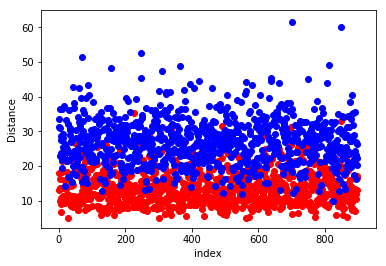

In [16]:
plt.scatter(x[0:900], y[0:900], color='r')
plt.scatter(x[0:900], y1[0:900], color='b')
plt.xlabel('index')
plt.ylabel('Distance')
plt.show()

In [17]:
np.savetxt('same_image_distance.txt', y)
np.savetxt('other_image_distance.txt', y1)

In [2]:
Y_reconstructed = np.loadtxt('same_image_distance.txt')
Y_other = np.loadtxt('other_image_distance.txt')

In [7]:
optimum_threshold = 0
accuracy = 0.0
min_misclassified_points = 10000
for threshold in np.arange(18, 20, 0.01):
    misclassified_points = 0
    for y in Y_reconstructed:
        if y > threshold:
            misclassified_points += 1
    for y in Y_other:
        if y < threshold:
            misclassified_points += 1
    if misclassified_points < min_misclassified_points:
        min_misclassified_points = misclassified_points
        optimum_threshold = threshold
        accuracy = 1 - (misclassified_points / 20000)

In [9]:
print(optimum_threshold)
print(accuracy)

19.120000000000175
0.868
